<a href="https://colab.research.google.com/github/Hwang-Jonghyeon/S1-pj/blob/main/211008_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [416]:
#from google.colab import drive
#drive.mount('/content/drive')

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [418]:
df = pd.read_csv('/content/vgames2.csv',encoding = 'utf-8')
df.isnull().sum()

df=df.dropna().reset_index()

In [419]:
df = df.loc[:,['Year','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype({'Year': int})

df['Year'] = df['Year'].apply(lambda x:x+2000 if x<= 21 else x)
df['Year'] = df['Year'].apply(lambda x:x+1900 if 22 < x<= 99 else x)
#연도 값 변경

df = df[df['Year'] >= 2000].sort_values(by='Year',ascending= False)
#df['Year'].value_counts()

In [420]:
df = df[~df.NA_Sales.str.contains('K')]
df = df[~df.EU_Sales.str.contains('K')]
df = df[~df.JP_Sales.str.contains('K')]
df = df[~df.Other_Sales.str.contains('K')]
#단위 K(1000)가 포함된 행 제거
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')
#단위 통일

In [421]:
df = df.astype({'NA_Sales': np.float,
                'EU_Sales': np.float,
                'JP_Sales': np.float,
                'Other_Sales': np.float})

df['all_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
#데이터 1차 전처리
df

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_Sales
14903,2017,PSV,Role-Playing,0.00,0.00,0.01,0.00,0.01
5196,2017,PSV,Action,0.00,0.00,0.01,0.00,0.01
9911,2017,PS4,Role-Playing,0.00,0.00,0.03,0.00,0.03
11037,2016,PS4,Racing,0.00,0.04,0.00,0.01,0.05
10977,2016,PS3,Misc,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...
6079,2000,PS2,Fighting,0.40,0.31,0.00,0.10,0.81
9658,2000,PS,Action,0.34,0.49,0.28,0.10,1.21
13495,2000,PS2,Action,0.08,0.07,0.00,0.02,0.17
7590,2000,PS,Fighting,0.00,0.00,0.11,0.01,0.12


In [422]:
game_df = df.loc[:,['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

game_df_group = game_df.groupby(['Year','Genre']).sum().sort_values(by='Year',ascending= False)
game_df_group
#2000년 이후 연도별/장르 총 판매량

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year Genre                                                  
2017 Role-Playing      0.00      0.00      0.04         0.00
     Action            0.00      0.00      0.01         0.00
2016 Racing            0.33      1.14      0.01         0.19
     Action            5.87      6.36      5.77         1.83
     Adventure         0.34      0.37      0.95         0.11
...                     ...       ...       ...          ...
2000 Shooter           4.00      2.17      0.20         0.46
     Simulation        1.11      0.77      1.27         0.22
     Sports           22.15      9.74      6.18         2.35
     Strategy          3.20      1.02      3.78         0.52
     Action           17.72     10.82      3.74         1.61

[205 rows x 4 columns]

In [423]:
game_df1 = df.loc[:,['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','all_Sales']]

game_group1_df = game_df1.groupby(['Year','Genre']).sum().sort_values(by='Year',ascending= False).reset_index()

In [424]:
game_df2 = df.loc[:,['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','all_Sales']]

game_group2_df = game_df2.groupby(['Genre']).sum().sort_values(by=['all_Sales'],ascending= False).reset_index()

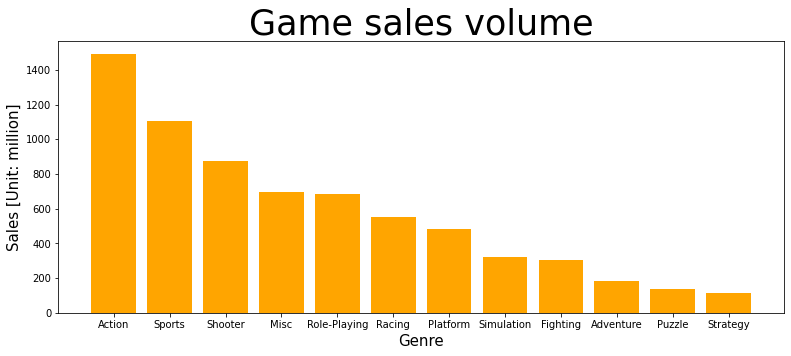

In [425]:
#2000년 이후 전체 게임 판매량 장르별 순위
bar_plot = game_group2_df.loc[:,['Genre','all_Sales']]
fig = plt.figure(figsize=(13,5))

parameters = {'axes.titlesize': 35,
              'axes.labelsize': 15
              }
plt.rcParams.update(parameters)

plt.title('Game sales volume')
plt.xlabel('Genre')
plt.ylabel('Sales [Unit: 1 million]')

plt.bar(bar_plot['Genre'],
        bar_plot['all_Sales'],
        color={'orange'})

plt.show()

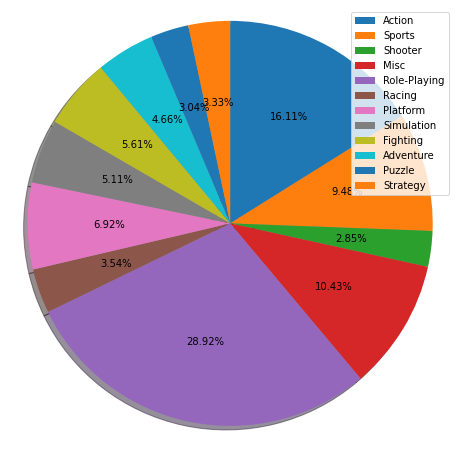

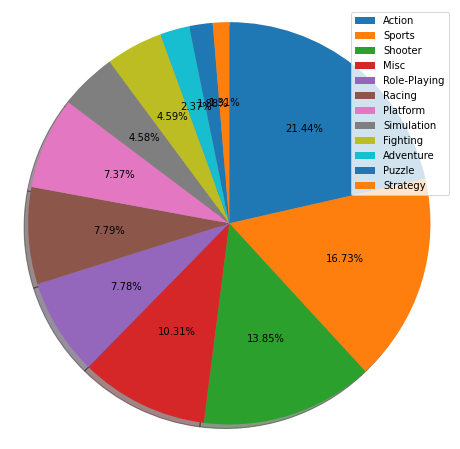

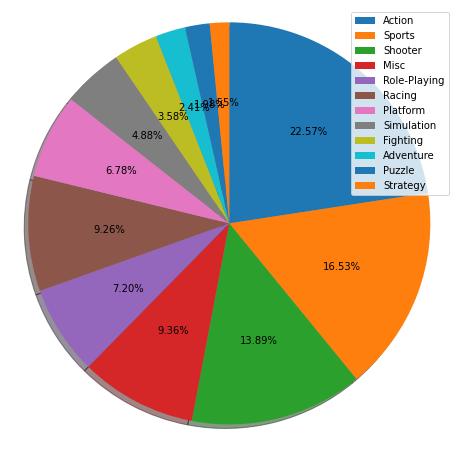

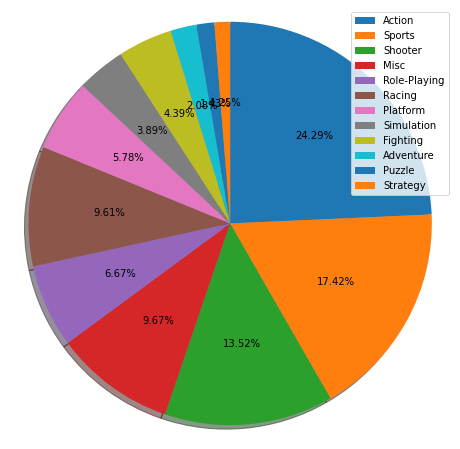

In [426]:
#파이차트를 통한 지역별 판매량이 높은 게임 (선호장르)


labels = game_group2_df['Genre']
explodes = [0.1, 0, 0]

def pie_chart(feature): 
  fig = plt.figure(figsize=(8,8))
  fig.set_facecolor('white')
  ax = fig.add_subplot()

  pie = ax.pie(feature, 
             startangle=90, # 시작점 90도
             counterclock=False, # 시계 방향
             autopct=lambda p : '{:.2f}%'.format(p),
             shadow=True
            )
  plt.axis('equal')
  plt.legend(labels)
  plt.show()

pie_chart(game_group2_df['JP_Sales'])
pie_chart(game_group2_df['NA_Sales'])
pie_chart(game_group2_df['EU_Sales'])
pie_chart(game_group2_df['Other_Sales'])


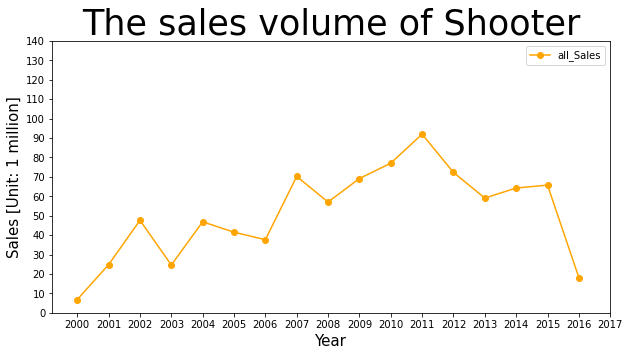

In [429]:
Year_00_03 = game_group1_df[(game_group1_df['Year'] < 2004)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_04_07 = game_group1_df[(game_group1_df['Year'] > 2003)&(game_group1_df['Year'] < 2008)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_08_11 = game_group1_df[(game_group1_df['Year'] > 2007)&(game_group1_df['Year'] < 20012)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_12_15 = game_group1_df[(game_group1_df['Year'] > 2011)&(game_group1_df['Year'] < 2016)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_16 = game_group1_df[(game_group1_df['Year'] > 2015)&(game_group1_df['Year'] < 2020)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

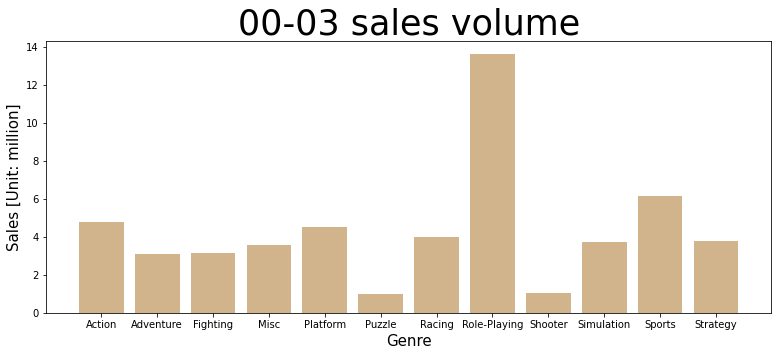

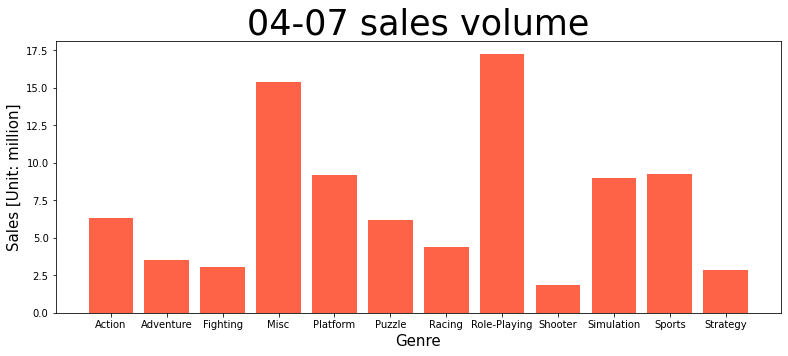

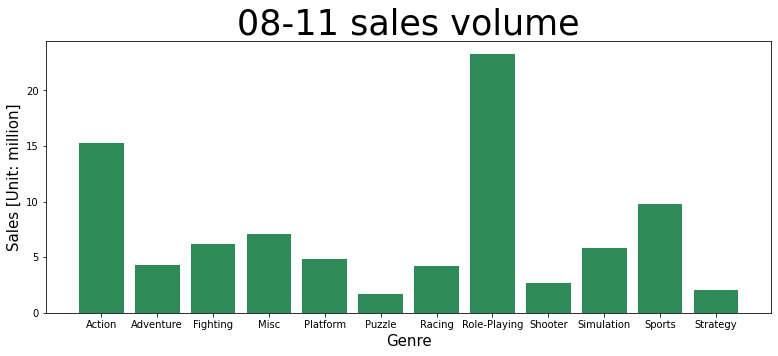

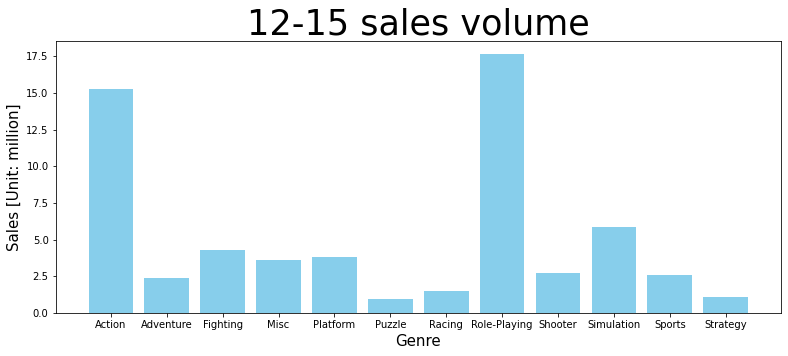

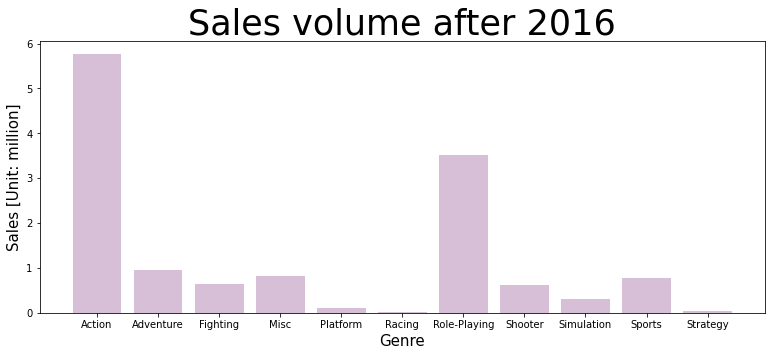

In [440]:
parameters = {'axes.titlesize': 35,
              'axes.labelsize': 15
              }
plt.rcParams.update(parameters)

#2000~2003년 지역별 판매량
def Year00_03(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'tan'})

  plt.title('00-03 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2004~2007년 지역별 판매량
def Year04_07(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'tomato'})

  plt.title('04-07 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2008~2011년 지역별 판매량
def Year08_11(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'seagreen'})

  plt.title('08-11 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2012~2015년 지역별 판매량
def Year12_15(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'skyblue'})

  plt.title('12-15 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2016년 이후 지역별 판매량
def Year16_(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'thistle'})

  plt.title('Sales volume after 2016')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

Year00_03(Year_00_03['Genre'],Year_00_03['JP_Sales'])
#2000~2003년 일본 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['JP_Sales'])
#2004~2007년 일본 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['JP_Sales'])
#2008~2011년 일본 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['JP_Sales'])
#2012~2015년 일본 지역 판매량
Year16_(Year_16['Genre'],Year_16['JP_Sales'])
#2016년 이후 일본 지역 판매량

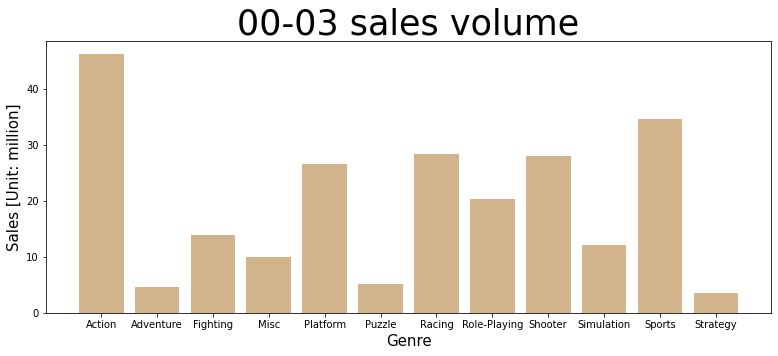

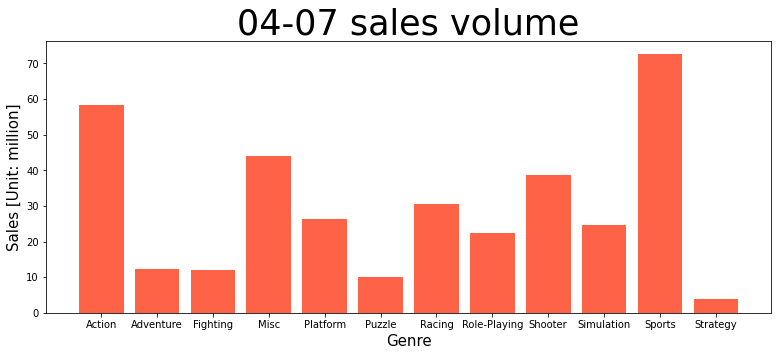

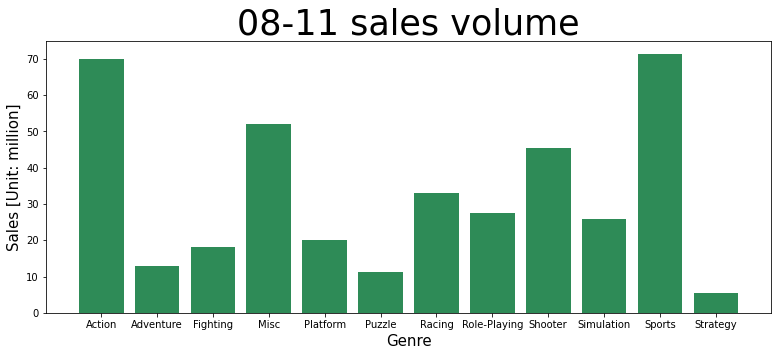

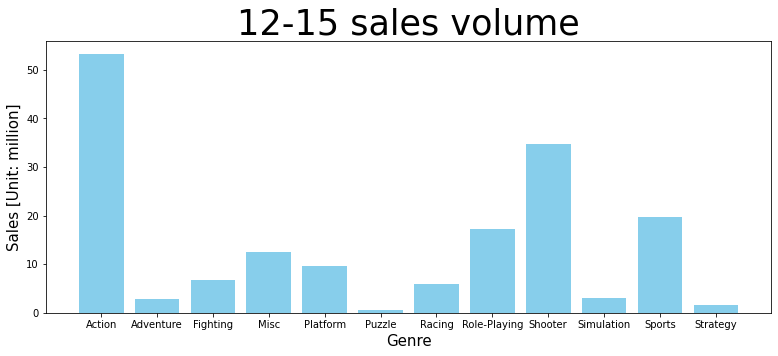

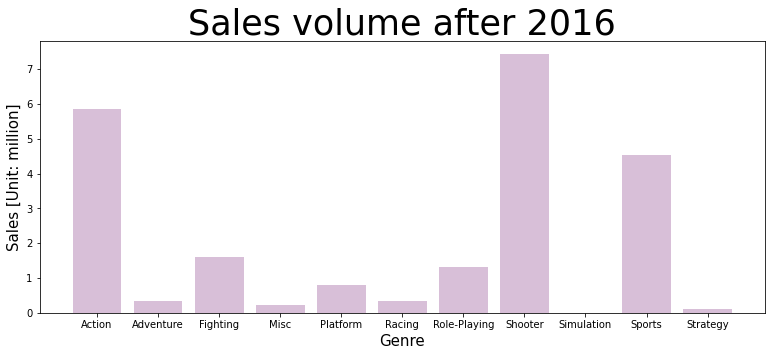

In [439]:
Year00_03(Year_00_03['Genre'],Year_00_03['NA_Sales'])
#2000~2003년 북미 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['NA_Sales'])
#2004~2007년 북미 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['NA_Sales'])
#2008~2011년 북미 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['NA_Sales'])
#2012~2015년 북미 지역 판매량
Year16_(Year_16['Genre'],Year_16['NA_Sales'])
#2016년 이후 북미 지역 판매량

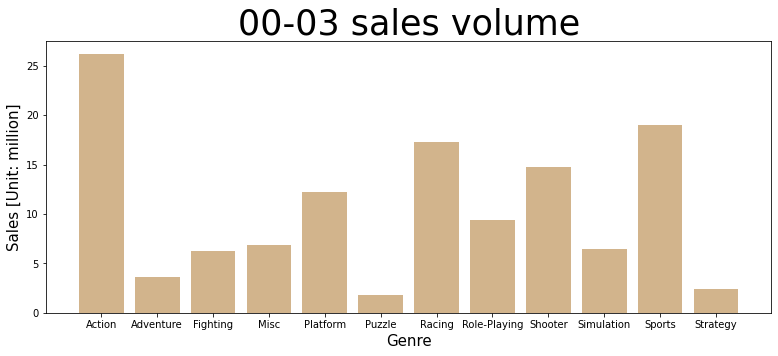

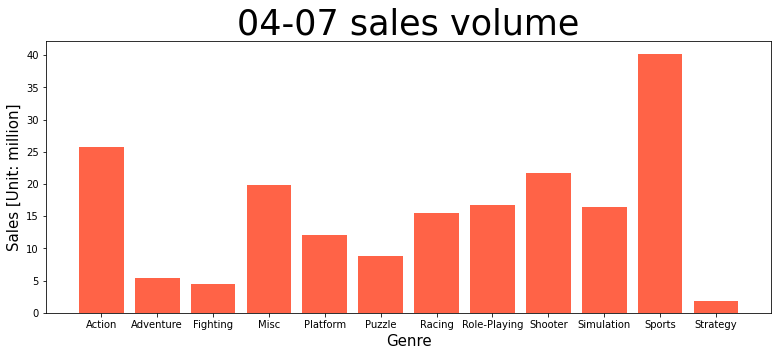

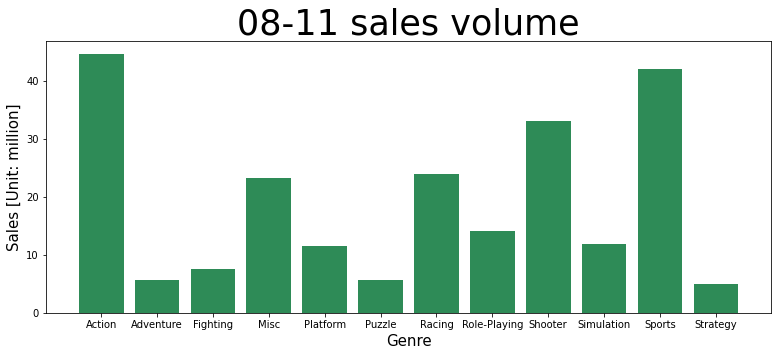

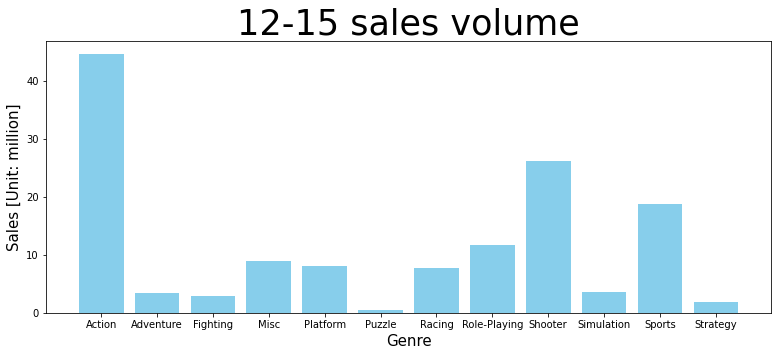

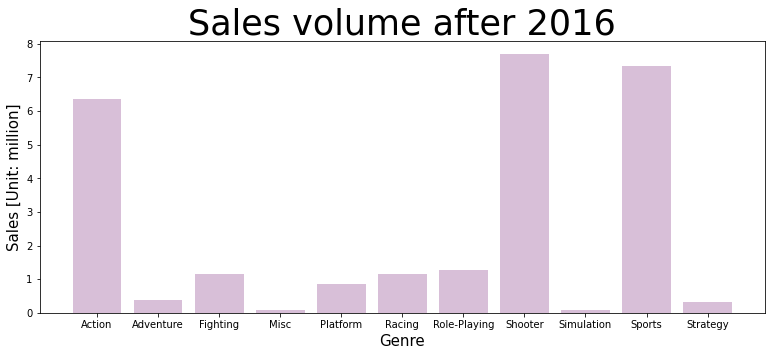

In [431]:
Year00_03(Year_00_03['Genre'],Year_00_03['EU_Sales'])
#2000~2003년 유럽 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['EU_Sales'])
#2004~2007년 유럽 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['EU_Sales'])
#2008~2011년 유럽 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['EU_Sales'])
#2012~2015년 유럽 지역 판매량
Year16_(Year_16['Genre'],Year_16['EU_Sales'])
#2016년 이후 유럽 지역 판매량

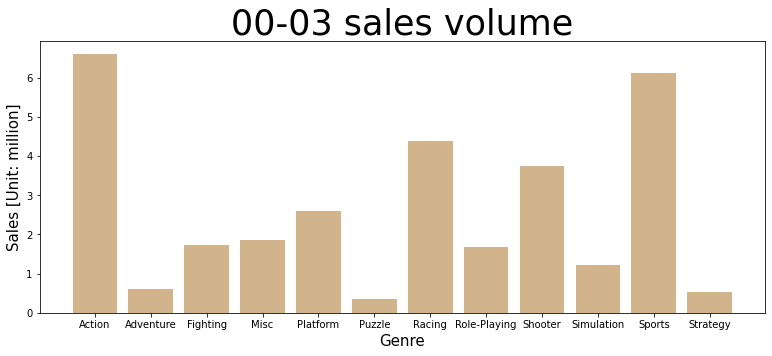

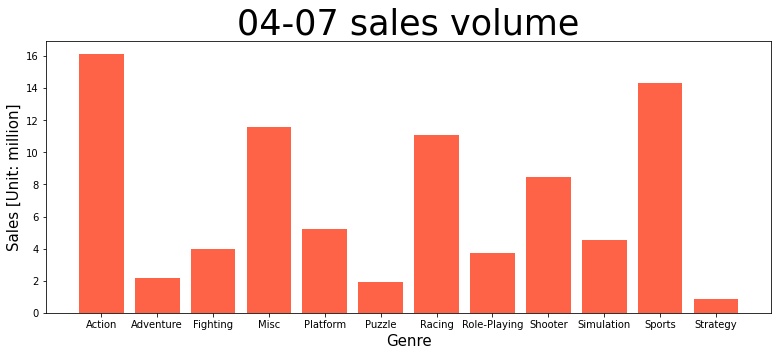

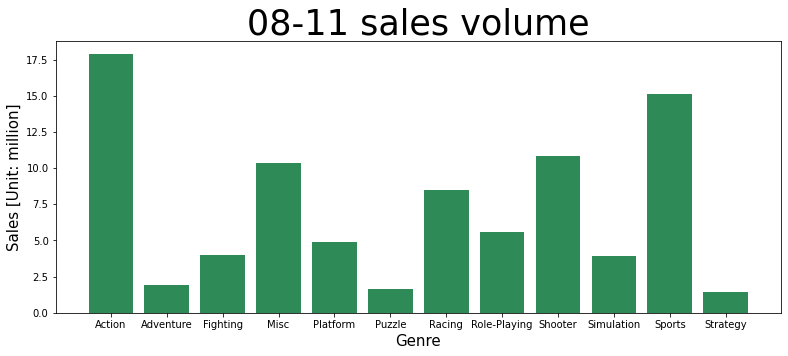

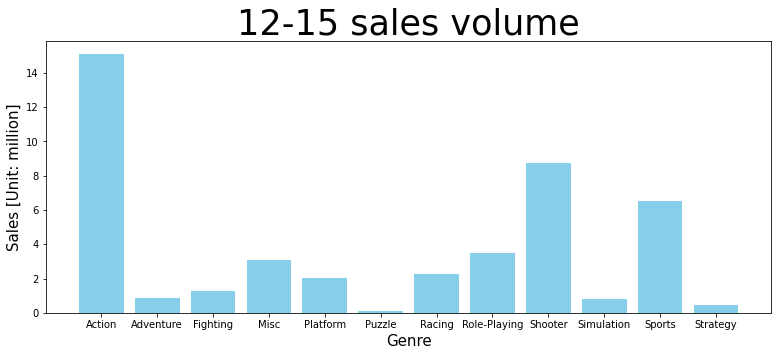

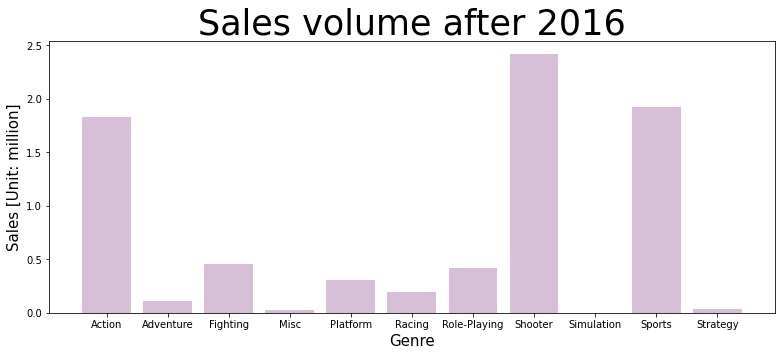

In [433]:
Year00_03(Year_00_03['Genre'],Year_00_03['Other_Sales'])
#2000~2003년 기타 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['Other_Sales'])
#2004~2007년 기타 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['Other_Sales'])
#2008~2011년 기타 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['Other_Sales'])
#2012~2015년 기타 지역 판매량
Year16_(Year_16['Genre'],Year_16['Other_Sales'])
#2016년 이후 기타 지역 판매량

In [441]:
#연도가 지날 수록 슈팅 게임의 판매량은 증가했는가?

after14_all = df.loc[:,['Year','Genre','all_Sales']]

after14_Shooter = df[df['Genre'] == 'Shooter'].loc[:,['Year','Genre','all_Sales']]

np.cov(after14_Shooter['Year'],after14_Shooter['all_Sales'])[0][1]
#연도와 슈팅게임 판매량은 양의 상관관계를 갖고있다. 증가 했음을 나타낸다.

1.1319062518428653

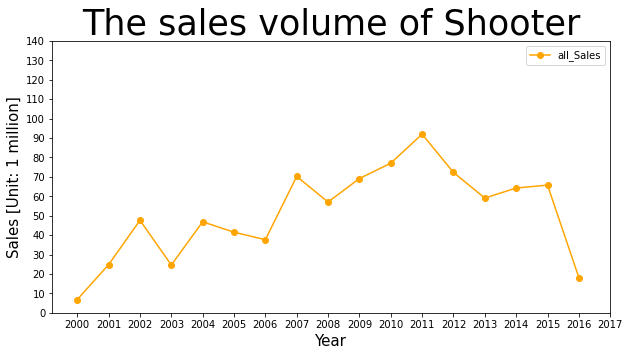

In [442]:
genre_Shooter_df = df.copy()
genre_Shooter_df = df[df['Genre'] == 'Shooter'].loc[:,['Year','Genre','all_Sales']].groupby(['Year']).sum()
#슈팅 장르 게임 연도별 판매량

ax_genre_Shooter = genre_Shooter_df.plot(color='orange',
                    marker='o')
plt.title('The sales volume of Shooter')
plt.ylabel('Sales [Unit: 1 million]')
plt.rcParams['figure.figsize'] = [10,5]
plt.xticks(range(2000,2018))
plt.yticks(range(0,150,10))
plt.show()
#슈팅 장르 연도별 판매량

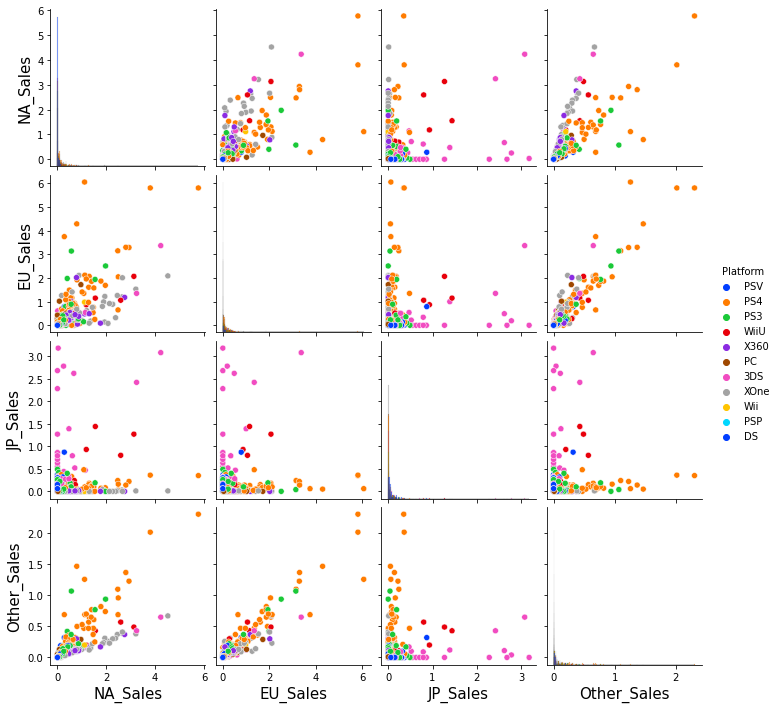

In [435]:
Platform = game_df3.loc[:,'Platform':'Other_Sales']

sns.pairplot(Platform,
             diag_kind='hist',
             hue='Platform',
             palette='bright')
plt.show()
#지역별 플랫폼 간 판매량